In [1]:
import numpy as np

In [9]:
import random

ModuleNotFoundError: No module named 'Random'

In [108]:
def initGame ():
    dealer_sum=random.randint(1,10)
    player_sum=random.randint(1,10)
    state=(dealer_sum,player_sum,0)
    return state

In [109]:
initGame()

(10, 6, 0)

In [230]:
def makeMove(state,action):
    dealer_sum,player_sum,done=state
    
   
    if(action==1):
         if(player_sum>0 and player_sum<=21):
            done=0
            new_card=random.randint(1,10)
            if(random.random()>0.66):
                player_sum=player_sum-new_card
                if(player_sum<1):
                    done=4
            else :
                player_sum=player_sum+new_card
                if(player_sum>21):
                    done=4
         else :
            done=4

    if action==0:

        while(dealer_sum<17):
            new_card=random.randint(1,10)
            if(random.random()>0.66):
                dealer_sum=dealer_sum-new_card
            else :
                dealer_sum=dealer_sum+new_card
        if(dealer_sum>21):
            
            done=2
        elif dealer_sum>player_sum :
            done=4
    
        elif(player_sum>dealer_sum):
            
            done=2
        elif(player_sum==dealer_sum):
            done=3
   
    state=(dealer_sum,player_sum,done)
    
    return state

In [231]:
def get_reward(state):
    dealer_sum,player_sum,done=state
    return 3-done
        
    
        
    

In [208]:
start=initGame()
print(start)

(10, 1, 0)


In [249]:
start=makeMove(1,start)
print(start)

TypeError: 'int' object is not iterable

In [211]:
print(get_reward(start))

-1


In [293]:
def createStates():
    states=[]
    for i in range(1,11):
        for j in range(1,22):
            states.append((i,j))
            
    return states
            

In [294]:
def createTable(states):
    av={}
    for i in states:
        av[(i,0)]=0
        av[(i,1)]=0
    return av

In [295]:
def initSAcount(stateActions):
    counts = {}
    for sa in stateActions:
        counts[sa] = 0
    return counts

In [296]:
def updateQtable(av_table, av_count, returns):
    for key in returns:
        av_table[key] = av_table[key] + (1.0 / av_count[key]) * (returns[key]- av_table[key])
    return av_table
    

In [297]:
def qsv(state, av_table):
    stay = av_table[(state,0)]
    hit = av_table[(state,1)]
    return np.array([stay, hit])

In [316]:


epochs=1000000
stateSpace=createStates()
av=createTable(stateSpace)
av_c=initSAcount(av)
for i in range(epochs):


    state=initGame()
    dealer,player,done=state
    state1=(dealer,player)
    returns={}
    while(state[2]==0):
        dealer,player,done=state
        state1=(dealer,player)
        if random.random()>1/(i+1):
            a=np.argmax(qsv(state1,av))

        else :
            a=random.randint(0,1)
        q_t=((state1,a))    
        
        state=makeMove(state,a)
        
        
        av_c[q_t]+=1
        
        returns[q_t]=0

    for key in returns:
   
        returns[key]=get_reward(state)
        
    av_table = updateQtable(av, av_c, returns)


In [311]:
len(stateSpace)

210

In [292]:
stateSpace

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (5, 20),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),


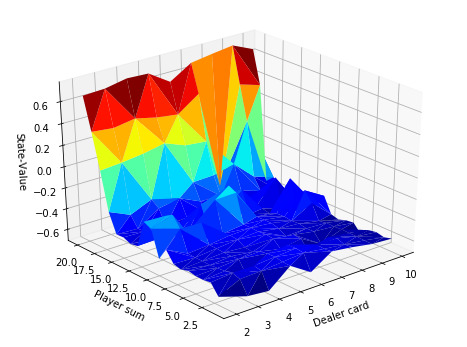

In [317]:
#3d plot of state-value space where no useable Aces are present
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', )

ax.set_xlabel('Dealer card')
ax.set_ylabel('Player sum')
ax.set_zlabel('State-Value')

x,y,z = [],[],[]
for key in stateSpace:
    if (key[0] > 1 and key[1] < 21):
        y.append(key[1])
        x.append(key[0])
        state_value = max([av[(key, 0)], av[(key, 1)]])
        z.append(state_value)
ax.azim = 230
ax.plot_trisurf(x,y,z, linewidth=.02, cmap=cm.jet)

In [282]:
qsv((20,5),av)

KeyError: ((20, 5), 0)

In [259]:
y

[]

In [260]:
z

[]